# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [2]:
## 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
## 동일 경로에 "train.csv"가 있다면
## 데이터 불러오기

titanic_df = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인
- 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [5]:
## 상위 5개 데이터 확인하기

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
## 각 Column의 데이터 타입 확인

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [7]:
## 데이터 전체 정보를 얻는 함수 : .describe()

titanic_df.describe()      # 수치형 데이터에 대한 요약만을 제공!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
## 상관계수 확인!

titanic_df.corr()
# Correlation is NOT Causation

# 상관성 : A up, B up, ...
# 인과성 : A -> B

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
## 결측치 확인

titanic_df.isnull().sum()
# Age, Cabin, Embarked에서 결측치 발견

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### I. Survived Column

In [10]:
## 생존자, 사망자 명수는?

# value_counts()
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

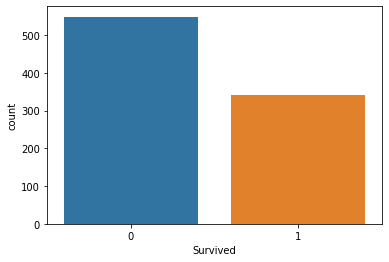

In [11]:
## 생존자수와 사망자수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x='Survived', data=titanic_df)
plt.show()

### II. Pclass

In [12]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
# 생존자 인원?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
## 생존 비율?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

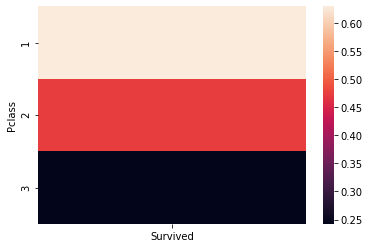

In [15]:
# 히트맵 활용

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

### III. Sex

In [16]:
# titanic_df[['Sex', 'Survived']]
titanic_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

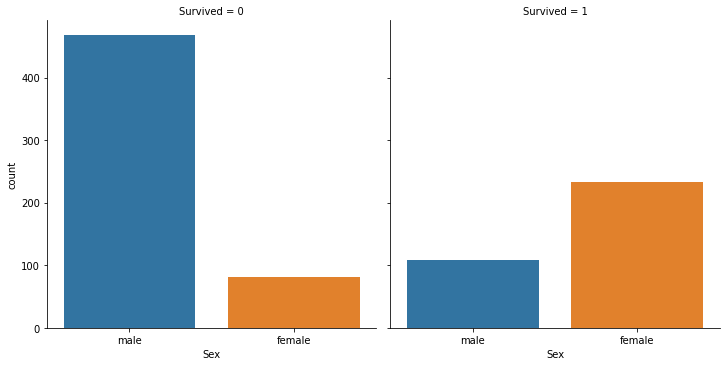

In [17]:
# sns.catplot

sns.catplot(x='Sex', col='Survived', kind='count',data=titanic_df)
plt.show()

### IV. Age
Remind : 결측치 존재

In [18]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
titanic_df[titanic_df.Survived == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

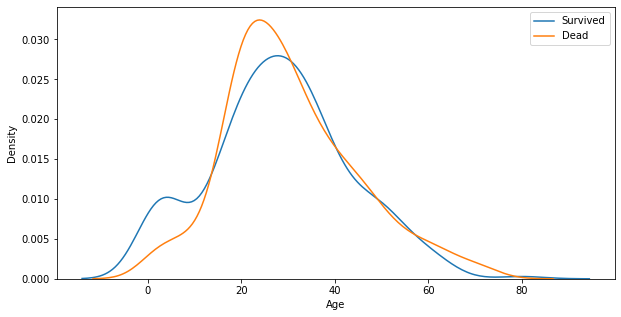

In [20]:
## Survived 1, 0과 Age의 경향성

# figure -> axis -> plot

fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'],ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'],ax=ax)

plt.legend(['Survived', 'Dead'])

plt.show()

### Appendix I. Sex + Pclass vs Survived

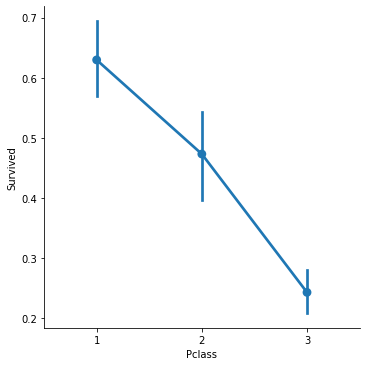

In [21]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df)
plt.show()

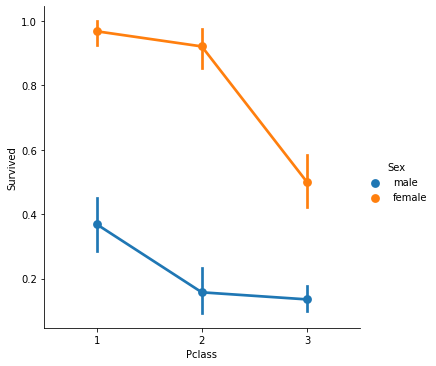

In [22]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()

### Appendix II. Age + Pclass

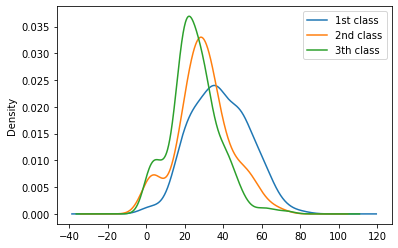

In [23]:
## Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3th class'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

In [24]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
titanic_df.groupby(['Survived','SibSp'])['Survived'].count()

Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: Survived, dtype: int64

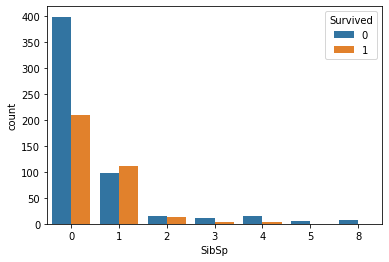

In [47]:
# sns.countplot

ax = sns.countplot(x='SibSp', data=titanic_df, hue='Survived')
ax.legend(title='Survived',loc='upper right')
plt.show()

In [29]:
titanic_df.groupby(['Survived','Parch'])['Survived'].count()

Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: Survived, dtype: int64

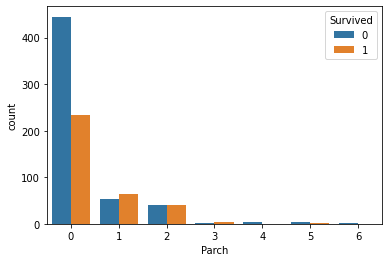

In [48]:
# sns.countplot

ax = sns.countplot(x='Parch',data=titanic_df, hue='Survived')
ax.legend(title='Survived',loc='upper right')
plt.show()

### 추론

- 생존 시 형제가 1명일 때는 생존율이 높아 지지만 그 이상일때는 사망율이 높아진다.

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

### 가설

1. 대륙별 행복도를 측정 후 어느 대륙의 행복도가 높은지 확인한다.
2. 행복도는 Logged GDP per capita 와 Social support가 높을 수록 높을 것이다.
3. 기대수명이 높다고 행복도가 높을까?

* 데이터 : [World Happiness Report 2021 Data](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021)

In [59]:
wrld_happiness = pd.read_csv('./world-happiness-report-2021.csv')

wrld_happiness.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [60]:
wrld_happiness.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [61]:
wrld_happiness.corr()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,-0.470787,0.999347,0.999396,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140,NaN,0.789745,0.756869,0.768138,0.607793,-0.017631,0.421205,0.492010
Standard error of ladder score,-0.470787,1.000000,-0.438612,-0.501150,-0.645799,-0.530815,-0.583805,-0.275182,0.138349,0.276997,NaN,-0.645776,-0.531010,-0.583806,-0.275171,0.138580,-0.277041,0.136827
upperwhisker,0.999347,-0.438612,1.000000,0.997489,0.777995,0.749215,0.758455,0.607797,-0.012616,-0.417560,NaN,0.777981,0.749187,0.758494,0.607838,-0.012435,0.417624,0.506880
lowerwhisker,0.999396,-0.501150,0.997489,1.000000,0.800064,0.763299,0.776364,0.606944,-0.022794,-0.423976,NaN,0.800048,0.763288,0.776402,0.606983,-0.022638,0.424042,0.477204
Logged GDP per capita,0.789760,-0.645799,0.777995,0.800064,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337,NaN,1.000000,0.785174,0.859488,0.432383,-0.199532,0.342332,-0.041119
Social support,0.756888,-0.530815,0.749215,0.763299,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207,NaN,0.785287,0.999996,0.723284,0.482896,-0.114913,0.203366,0.006681
Healthy life expectancy,0.768099,-0.583805,0.758455,0.776364,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374,NaN,0.859446,0.723155,0.999999,0.461485,-0.161767,0.364452,-0.023433
Freedom to make life choices,0.607753,-0.275182,0.607797,0.606944,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363,NaN,0.432350,0.483069,0.461454,0.999994,0.169587,0.401372,0.100242
Generosity,-0.017799,0.138349,-0.012616,-0.022794,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962,NaN,-0.199229,-0.114909,-0.161863,0.169261,0.999994,0.163924,-0.027212
Perceptions of corruption,-0.421140,0.276997,-0.417560,-0.423976,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000,NaN,-0.342310,-0.203422,-0.364303,-0.401069,-0.164171,-0.999996,0.004478


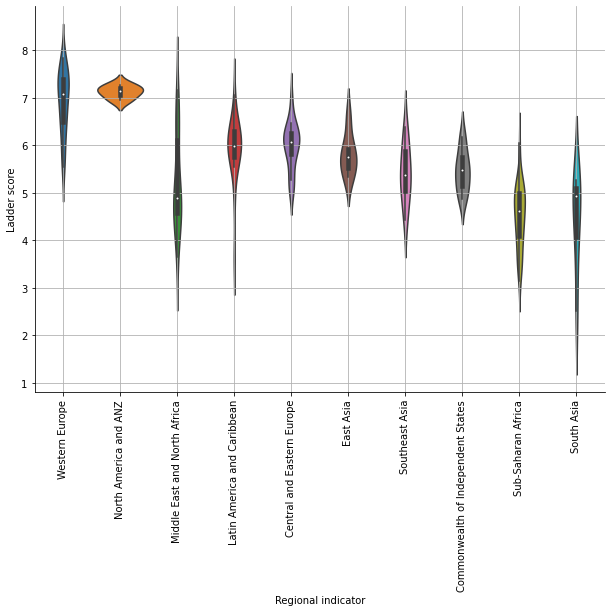

In [65]:
## 대륙별 행복도 확인

ax = sns.catplot(x='Regional indicator', y='Ladder score', kind='violin', aspect=10, data=wrld_happiness)
ax.fig.set_size_inches(8,6)

ax.set_xticklabels(rotation=90)
plt.grid()
plt.show()

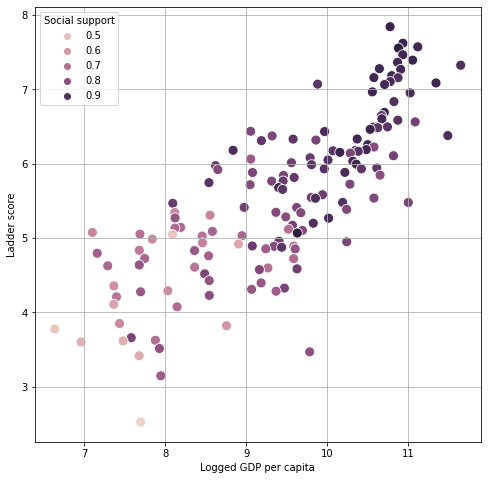

In [85]:
## 국가의 1인당 GDP와 복지와 관련된 행복도 관계

plt.figure(figsize=(8,8))
sns.scatterplot(x='Logged GDP per capita', y='Ladder score', hue='Social support', s=100, data=wrld_happiness)
plt.grid()
plt.show()

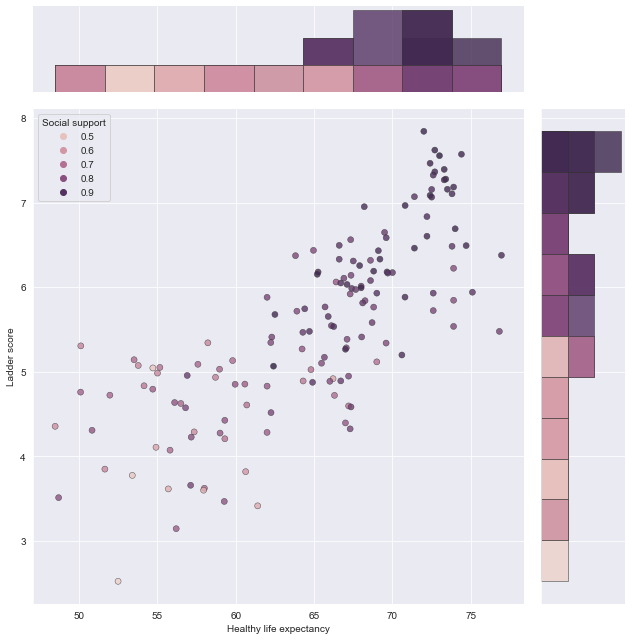

In [157]:
ax = sns.JointGrid(data=wrld_happiness, 
                   x='Healthy life expectancy', 
                   y='Ladder score',
                   hue='Social support',
                   height=9)

ax.plot(sns.scatterplot, sns.histplot, alpha=.8, edgecolor=".2", linewidth=.5)

# sns.set_style("whitegrid")
sns.set_palette("RdBu")

plt.show()

* Hint

1. 데이터를 톺아봅시다.
    - 각 데이터는 어떤 자료형을 가지고 있나요?
    - 데이터에 결측치는 없나요? -> 가지고 있다면 이를 어떻게 메꿔줄까요?
    - 에이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
    - 가설은 개인의 경험에 의해서 도출되어도 상관없습니다.
    - 가설은 명확할 수록 좋습니다. ex) Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    - 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.
    - `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    - `.merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
    - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?